# **Customer Retention**
 *A Data Science Project By Aparna Shasty*

In [15]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylab

import time
from scipy.stats import pearsonr

ModuleNotFoundError: No module named 'statsmodels'

In [16]:
ch = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
ch.info()
ch.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Overall Customer Churn percentage in the given dataset is 26.54 %


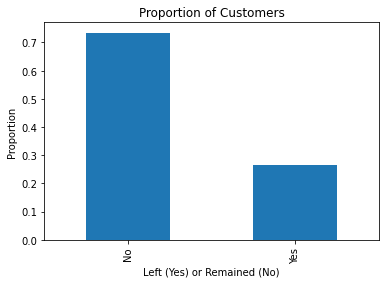

In [17]:
_ = (ch.groupby('Churn')['customerID'].count()/ch['customerID'].count()).plot.bar()
_ = plt.title('Proportion of Customers')
_ = plt.ylabel('Proportion')
_ = plt.xlabel('Left (Yes) or Remained (No)')
print('Overall Customer Churn percentage in the given dataset is {} %'.format(round(ch.Churn.replace({'No':0,'Yes':1}).mean()*100,2)))

In [18]:
# Examine the rows with total charges blank
ch[ch['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
ch[ch['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
ch.TotalCharges = ch.TotalCharges.apply(lambda x: 0  if x == ' ' else float(x))

In [21]:
# Change No internet service to NoInt for brevity
ch[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = ch[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].astype(str).replace({'No internet service': 'NoInt'})
ch['MultipleLines'] = ch['MultipleLines'].replace({'No phone service':'NoPh'})

Total Revenue Lost/Month due to Churn: $ 139130


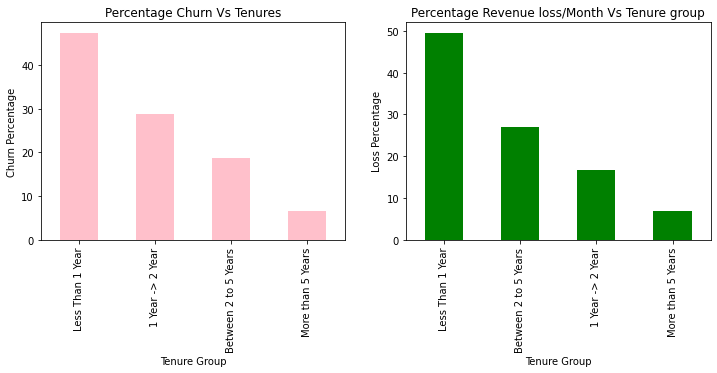

In [22]:
# Split the customers into 4 groups of tenures and see their Churn Rate
_ = plt.figure(figsize=(12,4))
_ = plt.subplot(1,2,1)
ch['Tenure Group'] = 'Between 2 to 5 Years'
ch.loc[ch['tenure'] >59,'Tenure Group'] = 'More than 5 Years' 
ch.loc[ch['tenure'] <= 24,'Tenure Group'] = '1 Year -> 2 Year'
ch.loc[ch['tenure'] <= 12,'Tenure Group'] = 'Less Than 1 Year'
ch['Ch10'] = ch['Churn'].replace({'Yes':1,'No':0})
ch_rate = ch.groupby('Tenure Group')['Ch10'].mean().sort_values(ascending=False)
(round(100*ch_rate,2)).plot.bar(color='pink')

# Evaluate the Revenue Loss per month
ch['revloss'] = ch['MonthlyCharges']*ch['Ch10']
_ = plt.ylabel('Churn Percentage')
_ = plt.title('Percentage Churn Vs Tenures')
_ = plt.subplot(1,2,2)
revenue_group = ch.groupby('Tenure Group')['revloss'].sum().sort_values(ascending=False)
(round(100*revenue_group/revenue_group.sum(),2)).plot.bar(color='g')
_ = plt.ylabel('Loss Percentage')
_ = plt.title('Percentage Revenue loss/Month Vs Tenure group')
print('Total Revenue Lost/Month due to Churn: $',int(revenue_group.sum()))

In [23]:
# Check the stats for numeic types within Churn and No Churn group
numvar = ['tenure','MonthlyCharges','TotalCharges']
round(ch.groupby('Churn')[numvar].describe().T,2)

Churn                      No      Yes
tenure         count  5174.00  1869.00
               mean     37.57    17.98
               std      24.11    19.53
               min       0.00     1.00
               25%      15.00     2.00
               50%      38.00    10.00
               75%      61.00    29.00
               max      72.00    72.00
MonthlyCharges count  5174.00  1869.00
               mean     61.27    74.44
               std      31.09    24.67
               min      18.25    18.85
               25%      25.10    56.15
               50%      64.43    79.65
               75%      88.40    94.20
               max     118.75   118.35
TotalCharges   count  5174.00  1869.00
               mean   2549.91  1531.80
               std    2329.95  1890.82
               min       0.00    18.85
               25%     572.90   134.50
               50%    1679.52   703.55
               75%    4262.85  2331.30
               max    8672.45  8684.80

Mean Tenure of Two groups
 Churn
No     37.57
Yes    17.98
Name: tenure, dtype: float64


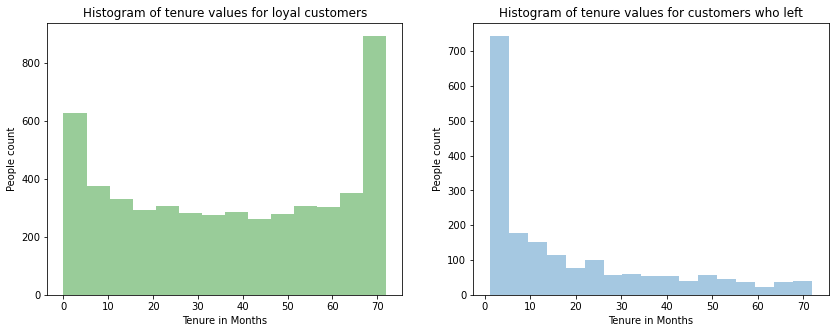

<Figure size 432x288 with 0 Axes>

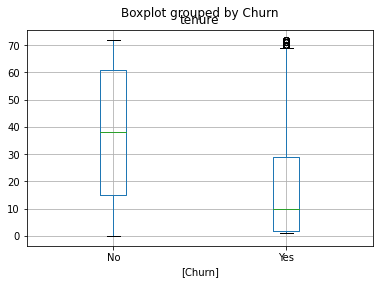

In [24]:
# Plot the histogram of the tenure and see if it tells any story!
fig, ax = plt.subplots(figsize=(14,5))
_ = plt.subplot(1,2,1)
sns.distplot(ch.loc[ch.Churn=='No','tenure'],hist=True,color='g',kde=False)
_ = plt.title('Histogram of tenure values for loyal customers')
_ = plt.xlabel('Tenure in Months')
_ = plt.ylabel('People count')
_ = plt.subplot(1,2,2)
sns.distplot(ch.loc[ch.Churn=='Yes','tenure'],hist=True,kde=False)
_ = plt.title('Histogram of tenure values for customers who left')
_ = plt.xlabel('Tenure in Months')
_ = plt.ylabel('People count')
print("Mean Tenure of Two groups\n",round(ch.groupby('Churn').tenure.mean(),2))
_ = plt.figure()
_ = ch[['Churn','tenure']].boxplot(by='Churn')

In [25]:
# Find the correlation between tenure*Monthly Vs TotalCharges
print("Correlation between Monthly*tenure Vs. Total Charges:",pearsonr(ch.tenure*ch.MonthlyCharges,ch.TotalCharges))

NameError: name 'pearsonr' is not defined

In [ ]:
ch['Temp'] = ch.tenure*ch.MonthlyCharges
lm = ols('TotalCharges ~ Temp',ch).fit()
lm.summary()

In [ ]:
ch.drop(['Temp'],axis=1,inplace=True)

In [ ]:
_ = pd.crosstab(ch.Contract,ch.Churn).plot.bar()
_ = plt.title('Churn Count for Contract')
_ = plt.ylabel('Churn/No Churn Counts')
print('Mean Churn Across',ch.groupby('Contract')['Ch10'].mean())
_ = pd.crosstab(ch.PhoneService,ch.Churn).plot.bar(color='cb')
_ = plt.title('Churn Count for Phone Service')
_ = plt.ylabel('Churn/No Churn Counts')
_ = pd.crosstab(ch.InternetService,ch.Churn).plot.bar(color='mr')
_ = plt.title('Churn Count for Internet Service')
_ = plt.ylabel('Churn/No Churn Counts')
print('Mean Churn Across',ch.groupby('PhoneService')['Ch10'].mean())
print('Mean Churn Across',ch.groupby('InternetService')['Ch10'].mean())

In [26]:
# Phone service is redundant.
print("Multiple Lines category counts:\n",ch.MultipleLines.value_counts())
print("Phone Lines category counts:\n",ch.PhoneService.value_counts())

Multiple Lines category counts:
 No      3390
Yes     2971
NoPh     682
Name: MultipleLines, dtype: int64
Phone Lines category counts:
 Yes    6361
No      682
Name: PhoneService, dtype: int64


In [51]:
y = ch.Ch10
X = ch.drop(['customerID','Churn','Ch10','TotalCharges','PhoneService','Tenure Group','revloss'],axis=1,inplace=False).copy()
temp = ch[['tenure','MonthlyCharges','SeniorCitizen']]
X.drop(['tenure','MonthlyCharges','SeniorCitizen'],axis=1,inplace=True)
X = X.apply(lambda x: x.astype('category')).apply(lambda x: x.cat.codes)
X[['tenure','MonthlyCharges','SeniorCitizen']] = temp
X1 = X.copy() # Saving a copy

Percentage Variance by removing TotalCharges: [20.6  13.1   7.74  6.92  5.93  5.89  5.06  4.9   4.56  4.29  4.12  4.06
  3.32  3.26  2.79  2.09  1.38]


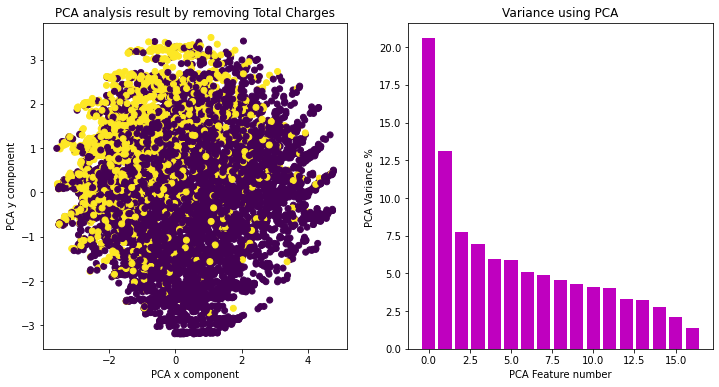

In [28]:
# We will reduce all features to 2D by PCA.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Essential to see the effect of all
X = sc.fit_transform(X)
fig = plt.figure(figsize=(12,6))
pca = PCA()
xx = pca.fit_transform(X)
xs = xx[:,0]
ys = xx[:,1]
fig.add_subplot(1,2,1)
_ = plt.scatter(xs,ys,c=y)
_ = plt.title('PCA analysis result by removing Total Charges')
_ = plt.xlabel("PCA x component")
_ = plt.ylabel("PCA y component")
fig.add_subplot(1,2,2)
_ = plt.bar(np.arange(pca.n_components_),100*np.round(pca.explained_variance_ratio_,4),color='m')
_ = plt.xlabel("PCA Feature number")
_ = plt.ylabel("PCA Variance % ")
_ = plt.title('Variance using PCA')
print("Percentage Variance by removing TotalCharges:",100*np.round(pca.explained_variance_ratio_,4))

Percentage Variance by tenure and monthly charges: [21.4242 10.924   8.1472  7.3523  6.2567  6.0066  5.337   5.1946  4.8161
  4.532   4.3432  4.2358  3.5212  3.4308  2.9433  1.535 ]


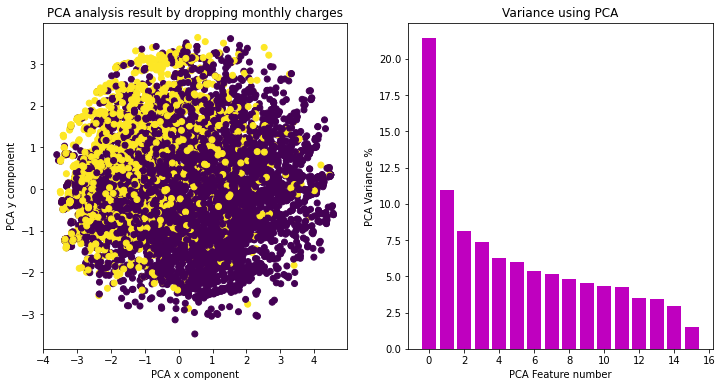

In [29]:
X1.drop(['MonthlyCharges'],axis=1,inplace=True)
fig = plt.figure(figsize=(12,6))
sc = StandardScaler()
X1 = sc.fit_transform(X1)
xx = pca.fit_transform(X1)
xs = xx[:,0]
ys = xx[:,1]
fig.add_subplot(1,2,1)
_ = plt.scatter(xs,ys,c=y)
_ = plt.title('PCA analysis result by dropping monthly charges')
_ = plt.xlabel("PCA x component")
_ = plt.ylabel("PCA y component")
fig.add_subplot(1,2,2)
_ = plt.bar(np.arange(pca.n_components_),100*np.round(pca.explained_variance_ratio_,4),color='m')
_ = plt.xlabel("PCA Feature number")
_ = plt.ylabel("PCA Variance %")
_ = plt.title('Variance using PCA')
print("Percentage Variance by tenure and monthly charges:",100*np.round(pca.explained_variance_ratio_,6))

Cluster Centers for loyal customers are at:
Month, Dollars, Numbers
[ 8.99 83.61] 955
[47.81 94.08] 431
[ 9.21 38.81] 483
Cluster Centers for loyal customers are at:
Month  Dollars  Numbers
[17.04 69.76] 1523
[32.52 24.78] 1791
[59.25 89.48] 1860


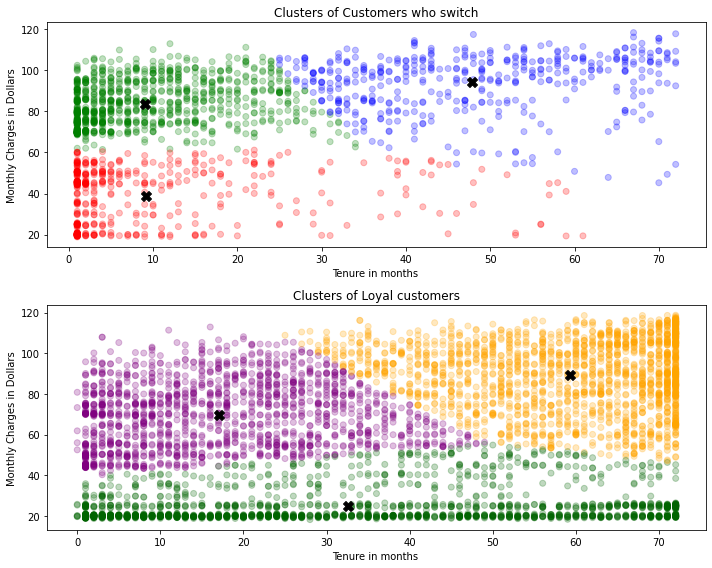

In [30]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Customer Churn
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(ch[ch.Churn=='Yes'][["tenure","MonthlyCharges"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2,1,1) #figsize=(10, 6))
plt.scatter(x="tenure",y="MonthlyCharges", data=ch[ch.Churn=='Yes'],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Tenure in months ")
plt.ylabel("Monthly Charges in Dollars")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Customers who switch")
print("Cluster Centers for loyal customers are at:")
print("Month, Dollars, Numbers")
print(np.round(kmeans.cluster_centers_[0,:],2),(kmeans.labels_==0).sum())
print(np.round(kmeans.cluster_centers_[2,:],2),(kmeans.labels_==2).sum())
print(np.round(kmeans.cluster_centers_[1,:],2),(kmeans.labels_==1).sum())

plt.subplot(2,1,2)

# Graph and create 3 clusters of Customer Churn
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(ch[ch.Churn=='No'][["tenure","MonthlyCharges"]])

kmeans_colors = ['darkgreen' if c == 0 else 'orange' if c == 2 else 'purple' for c in kmeans.labels_]

plt.scatter(x="tenure",y="MonthlyCharges", data=ch[ch.Churn=='No'],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Tenure in months ")
plt.ylabel("Monthly Charges in Dollars")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Loyal customers")
print("Cluster Centers for loyal customers are at:")
print("Month  Dollars  Numbers")
print(np.round(kmeans.cluster_centers_[1,:],2),(kmeans.labels_==1).sum())
print(np.round(kmeans.cluster_centers_[0,:],2),(kmeans.labels_==0).sum())
print(np.round(kmeans.cluster_centers_[2,:],2),(kmeans.labels_==2).sum())
_ = plt.tight_layout()

In [31]:
X = ch.drop(['customerID','Churn','Ch10','TotalCharges','PhoneService','Tenure Group','revloss'],axis=1,inplace=False).copy()

In [32]:
cat_vars=['gender','Partner','Dependents','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(ch[var], prefix=var)
    X1=X.join(cat_list)
    X=X1
X.drop(cat_vars,axis=1,inplace=True) # Originals need to be dropped

In [33]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'MultipleLines_No', 'MultipleLines_NoPh', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_NoInt',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_NoInt',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_NoInt',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_NoInt',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_NoInt',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_NoInt',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic ch

In [34]:
X.drop(['MultipleLines_NoPh','InternetService_No','OnlineSecurity_No','OnlineBackup_No',
        'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No',        
        'gender_Male','Partner_No','Dependents_No','PaperlessBilling_No',
        'Contract_Month-to-month','PaymentMethod_Credit card (automatic)'],axis=1,inplace=True)
X.drop(['StreamingMovies_NoInt','StreamingTV_NoInt','TechSupport_NoInt','DeviceProtection_NoInt','OnlineBackup_NoInt','OnlineSecurity_NoInt'],axis=1,inplace=True)
XLin = X[[ 'MultipleLines_No', 'MultipleLines_Yes','InternetService_Fiber optic', 'InternetService_DSL',
         'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes','StreamingTV_Yes', 'StreamingMovies_Yes']]

R^2 of the fit: 0.999
MSE of the model 1.05


,$ Per month
InternetService_Fiber optic,49.982
InternetService_DSL,25.004
MultipleLines_Yes,24.995
MultipleLines_No,19.978
StreamingTV_Yes,9.967
StreamingMovies_Yes,9.961
TechSupport_Yes,5.031
DeviceProtection_Yes,5.020
OnlineSecurity_Yes,5.016
OnlineBackup_Yes,4.991


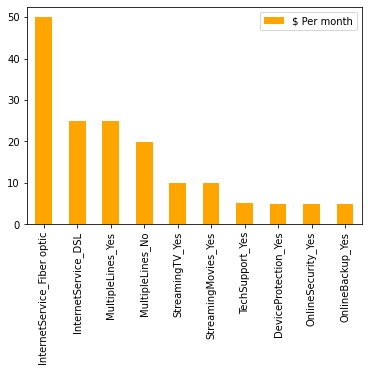

In [35]:
# Fit Linear Regression for Monthly Charges using services
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression(fit_intercept=False)
yLin = ch.MonthlyCharges
LinReg.fit(XLin,yLin)
pred = LinReg.predict(XLin)
print("R^2 of the fit:",np.round(LinReg.score(XLin,yLin),3))
print("MSE of the model {:.2f}".format(np.mean((pred - yLin) ** 2)))
lincoeff = pd.DataFrame(np.round(LinReg.coef_,3),index=XLin.columns,columns=['$ Per month'])
lincoeff.sort_values('$ Per month',ascending=False).plot.bar(color='orange')
lincoeff.sort_values('$ Per month',ascending=False)

In [36]:
# Checking for verification of normality
resid = pred-yLin
_ = sm.qqplot(resid,line='r')
_ = plt.title('Quantile Plot')
_ = plt.figure()
_ = sns.jointplot(pred,resid,color='r')
_ = plt.title('Residual Plot')
print("Percentage of outliers:{:.2f}".format(100*((abs(resid) > 2.25).sum())*resid.std()/XLin.shape[0]))
#(abs(resid) > resid.std()unt()
#print("Indices of outlier points:",list(np.argsort(abs(pred-ydev)).tail(10)))

NameError: name 'sm' is not defined

In [ ]:
all_cust = round((np.sum(XLin,axis=0)*LinReg.coef_),2)
index1 = y > 0
churn_cust = round((np.sum(XLin.loc[index1,:],axis=0)*LinReg.coef_),2)
joined = pd.concat([all_cust,churn_cust],axis=1)
joined.columns = ['All Customers','Churn Customers']
joined.plot.bar(width = 0.9)
_ = plt.title('Monthly Income Bar Chart across services')
_ = plt.ylabel('Monthly Income in Dollars')

In [ ]:
# We need to drop a few dummies to prevent correlations, in nonservice specific ones.
# Plotting correlation for top 10 features
# Ref : https://matplotlib.org/examples/color/colormaps_reference.html for colormap
X.drop('MonthlyCharges',axis=1,inplace=True)
_ = plt.figure(figsize=(16,12))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(),mask=mask,cmap='bwr')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [37]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
from sklearn.model_selection import GridSearchCV

def cv_optimize(clf, parameters, X, y, n_jobs=2, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    #print(gs.grid_scores_)
    best = gs.best_estimator_
    return best
#------------------------------------------------------------------------------#
# Function to plot ROC and find area under ROC                                 #
#------------------------------------------------------------------------------#
def find_auc_score(clf,Xin,yin,color='b',name='LogReg',label=1,prob=1) :
    '''Function to plot Receiver characteristics and find AUC'''
    if prob == 1:
        yscore = clf.predict_proba(Xin)
    else :
        yscore = clf.decision_function(Xin)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yin, yscore[:,label],pos_label=label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate,color ,label='AUC '+name+' = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return roc_auc


def pre_process_Xy(Xarray,yarray,test_tr_split_size=0.4) :
    '''Function to split given data into test and (train, dev) set'''
    Xtr,Xdev,ytr,ydev = train_test_split(Xarray,yarray,test_size=test_tr_split_size,random_state=42,stratify=yarray)
    return Xtr,Xdev,ytr,ydev
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def plot_train_test_error(clf,X,y,N=50):
    '''This function plots Train and Test Accuracy for different lengths'''

    training_error = np.empty([N,1])
    dev_error = np.empty([N,1])
    len_tr = int(X.shape[0]/N)
    re_ind = np.random.permutation(X.index)
    X = X.reindex(re_ind)
    y = y.reindex(re_ind)
    for i in range(N) :
        X1 = X[:(i+1)*len_tr]
        y1 = y[:(i+1)*len_tr]
        Xtr,Xte,ytr,yte = train_test_split(X1,y1,test_size=0.5,random_state=42,stratify=y1)
        clf = clf.fit(Xtr, ytr)
        training_error[i,0] = 1 - clf.score(Xtr, ytr)
        dev_error[i,0] = 1 - clf.score(Xte, yte)
    
    plt.plot(np.arange(N)*len_tr,training_error.reshape(np.arange(N).shape),label='train error')
    plt.plot(np.arange(N)*len_tr,dev_error.reshape(np.arange(N).shape),color='m',label='test error')
    plt.title('Train Error and Test Error Vs Number of Samples used (train: test 1:1 ratio)')
    plt.ylabel('Error rate')
    plt.xlabel('Number of samples')
    plt.legend(loc='best')
    return
    
def do_classify(clf, parameters, Xtr,ytr,Xdev,ydev, score_func=None, n_folds=5, n_jobs=2,model_name='LogReg',label=1,prob_dec=1):

    if parameters:
        clf = cv_optimize(clf, parameters, Xtr, ytr, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtr, ytr)
    training_accuracy = clf.score(Xtr, ytr)
    test_accuracy = clf.score(Xdev, ydev)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (100*training_accuracy)+'%')
    print("Accuracy on test data:     %0.2f" % (100*test_accuracy)+'%')
    print("confusion_matrix on dev data")
    ypred =  clf.predict(Xdev)
    print(confusion_matrix(ydev,ypred))
    print("classification report on dev data")
    print(classification_report(ydev,ypred))
    print("########################################################")
  #  multi_auc_roc(clf,Xdev,ydev,prob=1)
    auc_tr = find_auc_score(clf,Xtr,ytr,color='g',name=model_name+'_tr',label=label,prob=prob_dec) 
    auc_dev = find_auc_score(clf,Xdev,ydev,color='orange',name=model_name+'_dev',label=label,prob=prob_dec) 
    return clf,auc_tr,auc_dev


In [38]:
%%time
# Keep a copy to access columns
Xcpy = X.copy()
X['tenure'] = X['tenure'].transform(lambda x: (x - x.mean()) / x.std())
Xtrain, Xdev, ytrain,ydev = train_test_split(X,y,test_size=0.4,stratify=y)
# This is commented because hyperparameter tuning is not done currently.
#Xdev, Xtest, ydev,ytest = train_test_split(Xt,yt,test_size=0.5,random_state=42,stratify=yt)
parameters = {"C": [0.1,1,10,100,10000],"class_weight":['balanced',None]}
logreg,aucrf1,aucrf2 = do_classify(LogisticRegression(), parameters, Xtrain,ytrain,Xdev,ydev, score_func='recall', n_folds=5, n_jobs=2,label=1,prob_dec=1)

NameError: name 'train_test_split' is not defined

In [39]:
coeff=logreg.coef_
intercept = logreg.intercept_
coeffs_b= logreg.coef_[0,np.argsort(abs(logreg.coef_[0,:]))[::-1]]
names_b = list(Xcpy.columns[np.argsort(abs(logreg.coef_[0,:]))[::-1]])
logfimp = pd.DataFrame(np.round(coeffs_b,3),index=names_b,columns=['Coeff value'])
_ = logfimp.head(10).plot.bar(color='purple')
_ = plt.title('Feature Importance (Log Reg)')
_ = plt.ylabel('Coefficient value')
_ = plt.xlabel('Features')
logfimp

NameError: name 'logreg' is not defined

In [40]:
# Trying Feature Selection by limiting to 10
from sklearn.feature_selection import RFE
model = LogisticRegression(class_weight='balanced')
rfe = RFE(model, 10)
rfe = rfe.fit(Xtrain, ytrain)
# After RFE has chosen, now do a prediction using that
print("Chosen Predictors:",Xcpy.columns[rfe.support_])
Xp = Xcpy.loc[:,Xcpy.columns[rfe.support_]]
Xp = sc.fit_transform(Xp)
Xtrain1, Xt, ytrain1,yt = train_test_split(Xp,y,test_size=0.4,stratify=y)
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(Xtrain1,ytrain1)
yp = logreg.predict(Xt)
print("Report:\n",classification_report(yt,yp))
print("Dev Set Accuracy %",np.round(accuracy_score(yt,yp)*100,2))
print("Train set Accuracy %",np.round(accuracy_score(ytrain1,logreg.predict(Xtrain1))*100,2))
yprob = logreg.predict_proba(Xt)
false_positive_rate, true_positive_rate, thresholds = roc_curve(yt, yprob[:,1],pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
_ = plt.title('Receiver Operating Characteristic')
_ = plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
_ = plt.legend(loc='lower right')
_ = plt.plot([0,1],[0,1],'r--')
_ = plt.xlim([-0.01,1.01])
_ = plt.ylim([-0.01,1.01])
_ = plt.ylabel('True Positive Rate')
_ = plt.xlabel('False Positive Rate')

NameError: name 'LogisticRegression' is not defined

In [41]:
# Coefficients with LogReg
Xp = Xcpy.loc[:,Xcpy.columns[rfe.support_]]
coeffs = logreg.coef_[0,np.argsort(abs(logreg.coef_[0,:]))[::-1]]
names = list(Xp.columns[np.argsort(abs(logreg.coef_[0,:]))[::-1]])
print("Coefficients and their values in decreasing importance")
pd.DataFrame(np.round(coeffs,2),index=names,columns=['Coeff value'])

NameError: name 'rfe' is not defined

In [42]:
# To evaluate the extent of relation between churn and tenure, trying Logistic with tenure alone.
# Recognizing that tenure and churn are just correlated, it may not be causation
# We could verify if the coefficient with this is close to that obtained by the first 
# logistic regression that includes all variables
logreg_red = LogisticRegression(class_weight='balanced')
Xtrain, Xdev, ytrain,ydev = train_test_split(np.array(ch['tenure']),y,test_size=0.4,random_state=42,stratify=y)
logreg_red.fit(Xtrain.reshape(-1,1),ytrain)
ypred_red = logreg_red.predict_proba(Xdev.reshape(-1,1))
_ = plt.plot(np.sort(ypred_red[:,1]),label = 'Probability values')
ypred = logreg_red.predict(Xdev.reshape(-1,1))
ypred_s = ypred[np.argsort(ypred_red[:,1])]
spred = np.sort(ypred_red[:,1])
vline = spred[ypred_s.argmax()]
print("Threshold Chosen for classification:",round(vline,2))
print("Threshold Tenure:{} months".format(round(0.997/0.037)))
print("Max and Min Prob values:{} and {}".format(round(ypred_red.max(),2),round(ypred_red.min(),2)))
_ = plt.axhline(vline,color='k',linestyle='--',label = 'Threshold')
_ = plt.scatter(np.arange(len(ypred)),ypred_s,color='m',marker='.',label = 'Predictions')
_ = plt.legend(loc='best')
_ = plt.xlabel('Test sample index')
_ = plt.ylabel('Probability values')
_ = plt.title('Probability Plot of Churn')
print("Train Set Accuracy :{:.2f}%".format(100*accuracy_score(ytrain,logreg_red.predict(Xtrain.reshape(-1,1)))))
print("Dev Set Accuracy {:.2f}%".format(100*accuracy_score(ydev,ypred)))
print("Report:\n",classification_report(ydev,ypred))
print("Coefficient:{}, Intercept:{}".format(round(logreg_red.coef_[0,0],3),round(logreg_red.intercept_[0],3)))

NameError: name 'LogisticRegression' is not defined

In [43]:
X_rf = X = ch.drop(['customerID','Churn','Ch10','TotalCharges','PhoneService','Tenure Group','revloss'],axis=1,inplace=False).copy()
temp = X_rf[['tenure','MonthlyCharges','SeniorCitizen']]
X_rf = X_rf.drop(['tenure','MonthlyCharges','SeniorCitizen'],axis=1)
X_rf = X_rf.apply(lambda x: x.astype('category')).apply(lambda x: x.cat.codes)
X_rf[['tenure','MonthlyCharges','SeniorCitizen']] = temp
Xtrain, Xdev, ytrain,ydev = train_test_split(X_rf,y,test_size=0.4,stratify=y)

NameError: name 'train_test_split' is not defined

In [44]:
%%time
parameters = {"max_depth": [3,4,6,8,12], 'min_samples_leaf': [1,2,4,8],"class_weight":['balanced',None]}
tr,aucrf1,aucrf2 = do_classify(DecisionTreeClassifier(), parameters, Xtrain,ytrain,Xdev,ydev, score_func='recall', n_folds=5, n_jobs=2,model_name='DecTree',label=1,prob_dec=1)

NameError: name 'DecisionTreeClassifier' is not defined

In [45]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tr, out_file='dtree.dot', 
                         feature_names=X_rf.columns,  
                         class_names=['N','Y'],  
                         filled=True, rounded=True,  
                         special_characters=True)
#graph = graphviz.Source(dot_data)


ModuleNotFoundError: No module named 'graphviz'

In [46]:
%%time
parameters = {"max_depth": [3,4,6,8,12,None], 'min_samples_leaf': [1,2,4,6],"n_estimators":[10,50,100,200],"class_weight":['balanced',None]}
rf,aucrf1,aucrf2 = do_classify(RandomForestClassifier(), parameters, Xtrain,ytrain,Xdev,ydev, score_func='recall', n_folds=5, n_jobs=2,model_name='RandomForest',label=1,prob_dec=1)

NameError: name 'RandomForestClassifier' is not defined

In [47]:
feature_labels = np.array(list(X_rf.columns))
(pd.Series(rf.feature_importances_,index=feature_labels).sort_values(ascending=True)/np.max(rf.feature_importances_)).plot.barh(color='purple',width=0.9)
_ = plt.title('Normalized Feature Importance From Random Forest Classifier')
_ = plt.axvline(0.05,linestyle='--',color='olive')
_ = plt.text(0.05,7,'5% of the max',rotation=87,fontsize=16)
pd.DataFrame(rf.feature_importances_,index=feature_labels,columns=['Feature importance']).sort_values('Feature importance',ascending=False)

NameError: name 'rf' is not defined

In [48]:
# Predictive Model to use
# Assumes clean csv file
def cust_churn_prob_finder(coeff,intercept,csvfile):
    df = pd.read_csv(csvfile,usecols=range(20))
    df_monthly = df.MonthlyCharges
    df.drop(['TotalCharges','customerID','PhoneService','MonthlyCharges'],axis=1,inplace=True)
    cat_vars=['gender','Partner','Dependents','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(ch[var], prefix=var)
        X1=df.join(cat_list)
        df=X1
    df.drop(cat_vars,axis=1,inplace=True) # Originals need to be dropped
    df.drop(['MultipleLines_NoPh','InternetService_No','OnlineSecurity_No','OnlineBackup_No',
        'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No',        
        'gender_Male','Partner_No','Dependents_No','PaperlessBilling_No',
        'Contract_Month-to-month','PaymentMethod_Credit card (automatic)'],axis=1,inplace=True)
    df.drop(['StreamingMovies_NoInt','StreamingTV_NoInt','TechSupport_NoInt','DeviceProtection_NoInt','OnlineBackup_NoInt','OnlineSecurity_NoInt'],axis=1,inplace=True)
    df['tenure'] = df['tenure'].transform(lambda x: (x- x.mean())/x.std())
    prob_test = 1/ (1+ np.exp(-np.dot(np.array(df),coeff[0,:])-intercept))
    df['churn_prob'] = prob_test 
    df['charge*prob'] = df_monthly* prob_test 
    return df

In [49]:
df = cust_churn_prob_finder(coeff,intercept,'WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Report",classification_report(y,(df['churn_prob'] >= 0.5)))
print("Confusions\n",confusion_matrix(y,(df['churn_prob'] >= 0.5)))

NameError: name 'coeff' is not defined

In [50]:
df_churn = df[df['churn_prob'] >= 0.5]
index1 = df_churn.sort_values('charge*prob',ascending=False).index
temp = y*(df['churn_prob'] >= 0.5)
index2 = ch.loc[(temp > 0),'MonthlyCharges'].index
print("Potential revenue savings:${}".format(round(ch.loc[index2,'MonthlyCharges'].head(1485).sum())))

NameError: name 'df' is not defined